In [219]:
# to avoid warnings
import warnings

warnings.simplefilter("ignore", UserWarning)

## Attribute Information:
1. Car Name – Name of the car
2. Cyl – No of cylinders in the car – Multi-valued discrete
3. Disp – Displacement – continuous
4. Hp – Horsepower – continuous
5. Wt – Weight – continuous
6. Acc – Acceleration – continuous
7. Yr – Model of the car – Multivalued discrete
8. Mpg - Miles per gallon - continuous


## Steps to follow:
1.	EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points
2.	Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the data-set) – 5 points
3.	Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)
4.	Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)


In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
# Reading data from csv
car_mpg = pd.read_csv('cars-dataset.csv')  # readinf data_set
print (car_mpg.shape) # checking the shape of our data 
car_mpg.head() # prnting first 5 entries of car_mpg.csv

(398, 8)


,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [222]:
car_mpg.info()  # to check brief information of our data set columns data type and non-null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [223]:
('Null/Nan values = ',car_mpg.isna().sum().sum())  # checking for NULL values and summing them 

('Null/Nan values = ', 0)

In [224]:
car_mpg = car_mpg.replace( '?' , 0) # Replacing "?" by 0 

In [225]:
car_mpg['hp'] = car_mpg['hp'].astype('int64')  # changing type of 'hp' column from object to 'int64'

In [226]:
car_mpg.describe().transpose()  # understanding Five point summarry of our Data 

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,102.894472,40.269544,0.0,75.000,92.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [227]:
car_mpg['hp'] = car_mpg['hp'].replace(0, car_mpg['hp'].mean()) # 'hp' values cant be zero replacing zero with hp.mean

In [228]:
car_mpg.describe().transpose()  # checking acgin 5 point summary to observe distribution

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.445645,38.199671,46.0,76.000,95.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [229]:
car_mpg['hp'].min()  # confirming min value of hp is non zero

46.0

In [230]:
# understanding the frequency of each entries in non numerical columns and counting number of entries in car name colume 
count = pd.DataFrame(car_mpg['car name'].value_counts()) 
print('total new entries in "car name" column ',count.shape[0])
print ('total percentage of new entries in our data set is' , 100 * ( count.shape[0]/car_mpg.shape[0])  )
print ('As we have over 76% of different non numerical entries it safe to drop that column ')
count.head(5) # to show the first five entries and there frequencies 

total new entries in "car name" column  305
total percentage of new entries in our data set is 76.63316582914574
As we have over 76% of different non numerical entries it safe to drop that column 


,car name
ford pinto,6
amc matador,5
ford maverick,5
toyota corolla,5
chevrolet impala,4


In [231]:
print ('As we can see how much percent we have unique entries in car name column',(count.shape[0]/car_mpg.shape[0]))

As we can see how much percent we have unique entries in car name column 0.7663316582914573


#### As "car name "column is catagorical variable and it does have many unique entries which will give us difficult time while clustering, Hence it is safe to drop "car name " column

In [232]:
#df = car_mpg.drop(columns='car name' , axis= 1)
df  = car_mpg.drop(columns= ['car name'],axis=1 ) # droping the 'car name' column

In [233]:
df.columns #Checking column  names

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

# Find the Relations 

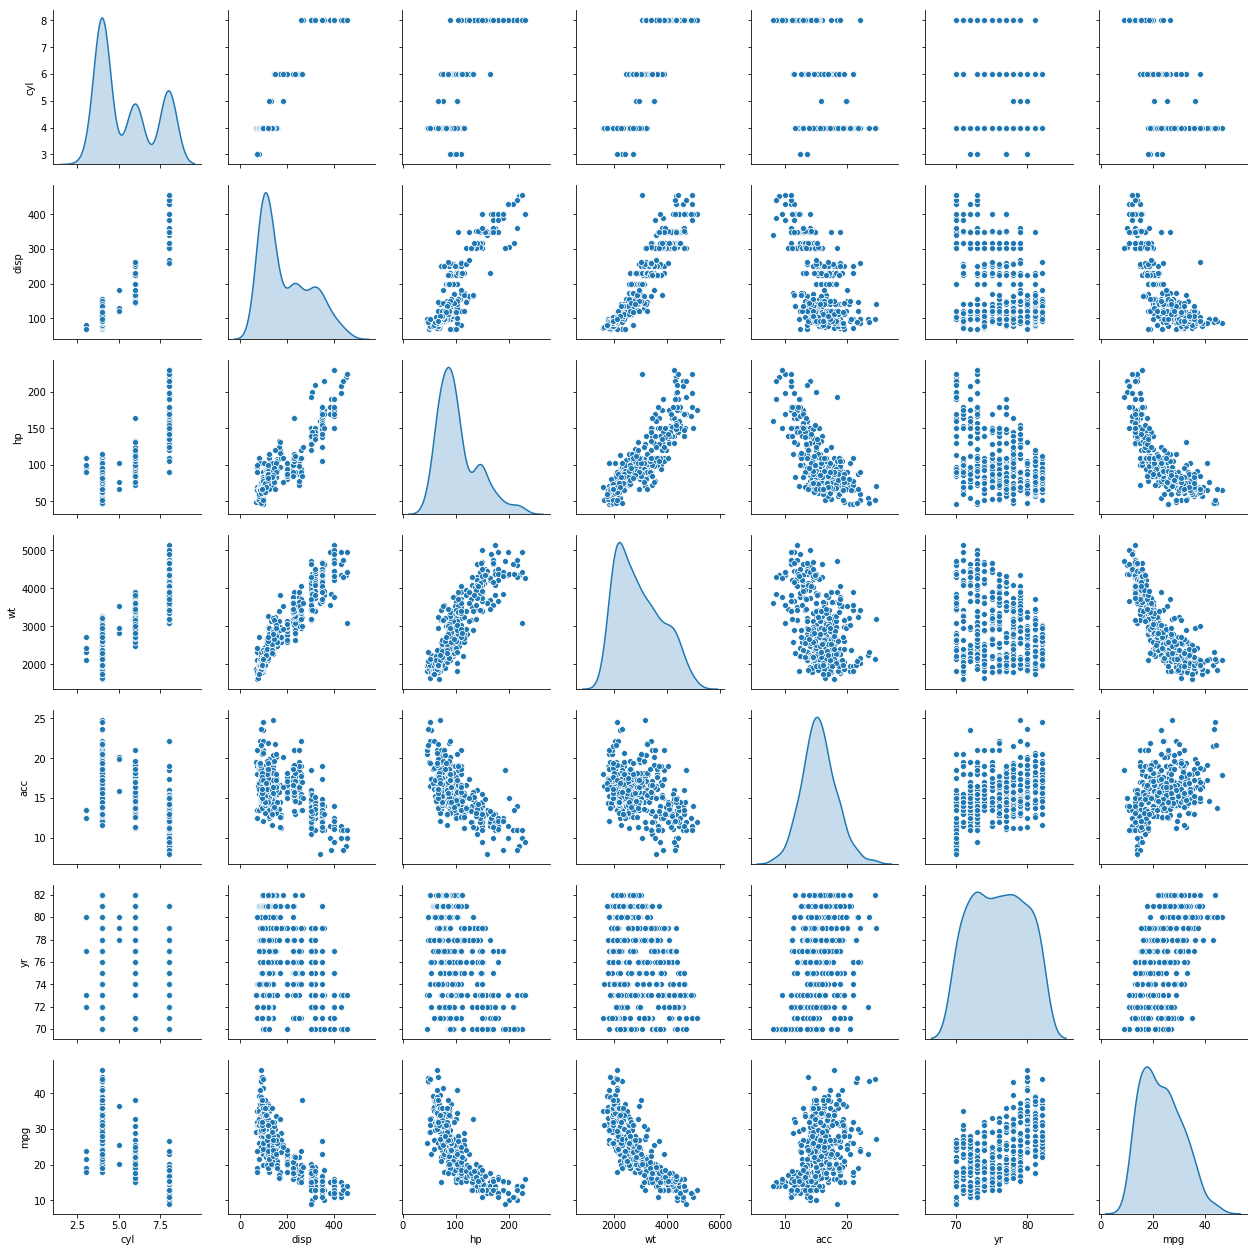

In [234]:
sns.pairplot (df,diag_kind= ('kde'))  # from distribution plotsand scatter plots we can predict how many cluster shout we get 


- 'cyl' and 'dis'columns show three visible Gaussians (peeks)
- 'hp' columns two Gaussians (peeks) are visible 
- 'mpg' and 'wt' coulumn shows two Gaussians (peeks) but those are not clearly visible 
- 'acc' shows only one Gaussian (peek) so that column will not make much difference in clustering 
- 'cyl','dis' and 'hp columns' proves to be a good features for clustering
- From pair plot we can conclude that our car_mpg.csv data has minimum of three cluster as seen from 'cyl' column distribution 
- Maximum Nuber of gaussians can vary between 3 to 6 as two gaussian are also visible in 'hp' column distribution 

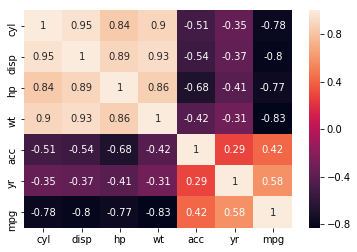

In [235]:
sns.heatmap(df.corr(), annot= True)  # finding the correlation between different columns 

- from  the heatmap we can observe that 'cyl' , 'disp','wt' and 'hp' has high positive correlation between them (above .8  )
- and "mpg" column has high Negative correlation with 'cyl' , 'disp','wt' and 'hp' that is also arount .8
- 'acc' and 'yr' column has week negative correlation with other columns and we may neglet then if required

## Standardizeing the data 

In [236]:
from scipy import stats  # importins stats laibrary from scipy package to scale our data 


scaled_df = pd.DataFrame( stats.zscore(df),columns=['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']) # applying zScore onour data

# statistics of scaled data
scaled_df.describe().transpose() #checking 5 point summary

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,-5.171742e-16,1.001259,-1.444949,-0.856321,-0.856321,1.498191,1.498191
disp,398.0,-8.312725e-17,1.001259,-1.204411,-0.856318,-0.431404,0.658488,2.511784
hp,398.0,7.726929e-17,1.001259,-1.531930,-0.745594,-0.247582,0.538754,3.290928
wt,398.0,-9.902743e-17,1.001259,-1.604943,-0.882827,-0.197362,0.753834,2.565185
acc,398.0,8.982206e-17,1.001259,-2.747814,-0.632879,-0.024722,0.583435,3.351912
yr,398.0,-8.837152e-16,1.001259,-1.627426,-0.815074,-0.002721,0.809631,1.621983
mpg,398.0,2.761610e-16,1.001259,-1.859374,-0.770491,-0.065919,0.702705,2.957335


# K - Means Clustering

In [237]:
from sklearn import metrics 
from sklearn.cluster import KMeans # importing Kmeans clustering from sklearn.cluster 
 

In [238]:
#Assign a dummy array called Cluster_error
cluster_error = []

In [239]:
# Calculate errorrs for each K

# KMeans Clustring Algorithm
# Label, Intertia and Centroid
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6

#cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, init='k-means++') # applying culster Kmeans
  clusters.fit(scaled_df)                        # fitting our data 
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_error.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_error } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2786.000000
1,2,1295.991050
2,3,947.326223
3,4,739.766998
4,5,668.490396
5,6,601.112910
6,7,542.459502
7,8,497.966285
8,9,457.296708


### Plotting Elbow/ Scree Plot

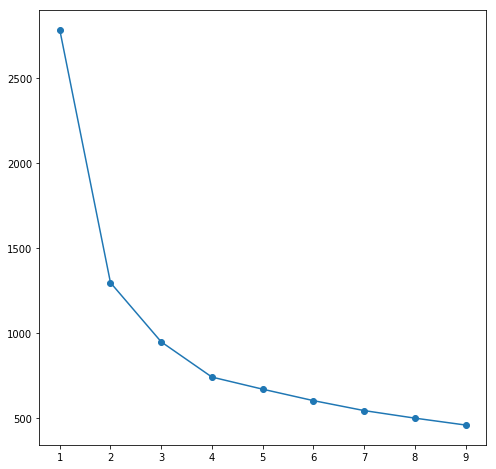

In [240]:
#Ploting Number of cluster against cluster error
plt.figure(figsize=(8,8)) #giving fig size 
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

1. we select that value of k where the gradiant reduces drastically 
2. here in the elbow curve we can obsever that gradiant from k= 3 to k= 4 is changing at higher rate so in this k we will go with k= 3
3. k= 3 we will select

### Using optimal value of K - Cluster the data.

In [248]:
cluster = KMeans( n_clusters = 3, init='k-means++' )  # instantiating cluster object with optimal K value 
cluster.fit(scaled_df) # fiting data 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [249]:
# kmeans.cluster_centers_ function to pull the centroid information from the instance

centroids = cluster.cluster_centers_
centroids

array([[ 0.35772459,  0.24687769, -0.04392762,  0.30829922,  0.28578589,
        -0.00272145, -0.47905415],
       [-0.85347696, -0.80321374, -0.67323192, -0.78549879,  0.36133415,
         0.30992304,  0.75394661],
       [ 1.49819126,  1.50068407,  1.51132694,  1.40001604, -1.07612225,
        -0.6725559 , -1.15871315]])

In [250]:
# Store the centroids in a dataframe with column names from the original dataset given

centroid_df = pd.DataFrame(centroids, columns = list(df) )
centroid_df.head()


,cyl,disp,hp,wt,acc,yr,mpg
0,0.357725,0.246878,-0.043928,0.308299,0.285786,-0.002721,-0.479054
1,-0.853477,-0.803214,-0.673232,-0.785499,0.361334,0.309923,0.753947
2,1.498191,1.500684,1.511327,1.400016,-1.076122,-0.672556,-1.158713


## visualisation of our cluster


In [251]:
labels=cluster.predict(scaled_df)  # prediting the lables for our each data point learned model
scale_df = pd.DataFrame(scaled_df) # different dataFrame is created to avoid name space error
scale_df["GROUP"] = labels # creating new column Named "GROUP" to accomodate lables for our each data point 

In [252]:
# counting number of points in each cluster
scale_df["GROUP"].value_counts() # counting Number of data point in cluster

1    207
0     96
2     95
Name: GROUP, dtype: int64

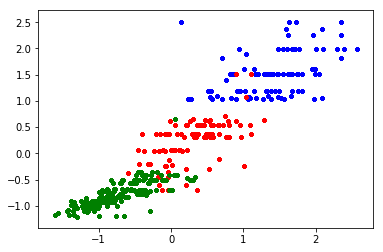

In [253]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']  # creating colors List
fig, ax = plt.subplots() # creating subplot
c = np.array([3,3]) 

for i in labels:  
        points = np.array(scale_df.loc[scale_df['GROUP'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 3], points[:, 1], s=7, c=colors[i])

### Use kmeans.labels_ function to print out the labels of the classes

In [254]:
cluster.labels_   # observing the cluster lables for all data points 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0,

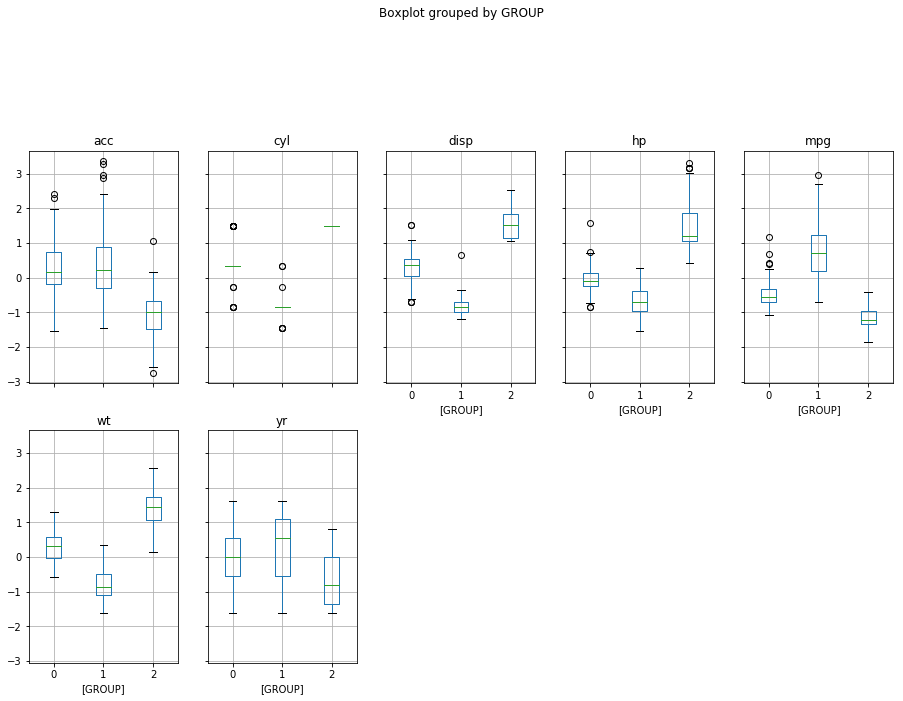

In [255]:
# Ploting boxplotto get idea of overlap between cluster of various features 
import matplotlib.pylab as plt
scaled_df.boxplot(by = 'GROUP',  layout=(5,5), figsize=(15, 25));  

- From the above box plots we can see no major overlapings are observed 
- but only for column which is 'yr' we can drop it to see if we get better results or not 
- out liers are visible in every colums except 'wt' and 'yr'column
- conclusion is that we have achived a good cluster as there is not much overlaps in boxplot

## Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

In [256]:
scale_df.head() # getting idea of our dataframe with cluster lables for evaluating our clusters 

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,1.498191,1.090604,0.669810,0.630870,-1.295498,-1.627426,-0.706439,2
1,1.498191,1.503514,1.587201,0.854333,-1.477038,-1.627426,-1.090751,2
2,1.498191,1.196232,1.194034,0.550470,-1.658577,-1.627426,-0.706439,2
3,1.498191,1.061796,1.194034,0.546923,-1.295498,-1.627426,-0.962647,2
4,1.498191,1.042591,0.931922,0.565841,-1.840117,-1.627426,-0.834543,2


In [257]:
df_0 = scale_df.groupby('GROUP').get_group(0) # Making seprate DataFarme for cluster lable "0"
df_0.shape  # checking shape for cross conforming

(96, 8)

In [33]:
df_1 = scale_df.groupby('GROUP').get_group(1)  # Making seprate DataFarme for cluster lable "1"
df_1.shape  # checking shape for cross conforming

(95, 8)

In [34]:
df_2 = scale_df.groupby('GROUP').get_group(2)  # Making seprate DataFarme for cluster lable "1"
df_2.shape   # checking shape for cross conforming

(207, 8)

In [35]:
# counting number of points in each cluster
scale_df["GROUP"].value_counts()  # for cross check

2    207
0     96
1     95
Name: GROUP, dtype: int64

# linear Regression Model with Full Data 

In [259]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
 

X = scale_df.drop(columns= 'GROUP', axis= 1)  # Creating Independent variable 
y = scale_df['GROUP'] # creating Dependent variable 

print ('Independent variable data shape ', X.shape)
print ('dependent variable data shape ', y.shape)

Independent variable data shape  (398, 7)
dependent variable data shape  (398,)


In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # spliting Test_Train data 

print ('X_train set shape  ', X_train.shape)
print ('y_train set shape  ', y_train.shape)
print ('X_test set shape  ', X_test.shape)
print ('X_test set shape  ', y_test.shape)

X_train set shape   (318, 7)
y_train set shape   (318,)
X_test set shape   (80, 7)
X_test set shape   (80,)


In [261]:
regressor = LinearRegression()  # Instanciating Linear regrassion object 
regressor.fit(X_train, y_train) # fitting our data 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [262]:
# Creating dataframe for coefficient and coulumns 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])    
coeff_df

,Coefficient
cyl,-0.059372
disp,0.087775
hp,0.429846
wt,0.139594
acc,-0.120223
yr,-0.164418
mpg,0.459987


In [263]:
y_pred = regressor.predict(X_test) # predict the data from our test set 

In [264]:
# creating DataFrame from Predicted and Actual
ytrue_ypred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
ytrue_ypred.head()

,Actual,Predicted
65,2,1.525864
132,1,0.731614
74,2,1.175451
78,1,0.666296
37,0,0.930615


<b> Mean Absolute Error </b>The mean absolute error (MAE) is the simplest regression error metric to understand. We’ll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. Effectively, MAE describes the typical magnitude of the residuals

<b> Mean Square Error </b>The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value

<b> Root Mean Squared Error (RMSE)</b>. As the name suggests, it is the square root of the MSE. Because the MSE is squared, its units do not match that of the original output. Researchers will often use RMSE to convert the error metric back into similar units, making interpretation easier


If  is the estimated target output,  the corresponding (correct) target output, and  is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

e x p l a i n e d _ v a r i a n c e ( y , y ^ ) = 1 - ( V a r { y − y ^ }/ V a r { y })


The best possible score is 1.0, lower values are worse.

In [266]:
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('explained_variance_score:' , metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error : 0.4207277198175423
Mean Squared Error: 0.2778134805531197
Root Mean Squared Error: 0.527080146233113
explained_variance_score: 0.45747001198264603


Evaluation Matrix we observed Here is not good MAE,MSE and RMSE needs to be as low as posible and Explained Varience score shoud be as Hi as posible.

# linear regression model  with df_0

In [79]:
# using one vs all strategy
df_1_2 = pd.concat([df_1,df_2],ignore_index=True) # concatinating cluters belonging to lable 1 and 2
df_1_2['GROUP'] = df_1_2['GROUP'].replace(to_replace = 2 , value = 1)  # replacing all labels of culster 2 to 1 
df_1_2_0 = pd.concat([df_0,df_1_2],ignore_index=True)#concatination cluster labled with 0 with two cluster whose lable is now 1
df_1_2_0.shape  # cross checking shape of new DataFrame with that of original DataFrame

(398, 8)

In [267]:
X = df_1_2_0.drop(columns= 'GROUP', axis= 1)
y = df_1_2_0['GROUP']

print ('Independent variable data shape ', X.shape)
print ('dependent variable data shape ', y.shape)

Independent variable data shape  (398, 7)
dependent variable data shape  (398,)


In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print ('X_train set shape  ', X_train.shape)
print ('y_train set shape  ', y_train.shape)
print ('X_test set shape  ', X_test.shape)
print ('X_test set shape  ', y_test.shape)

X_train set shape   (318, 7)
y_train set shape   (318,)
X_test set shape   (80, 7)
X_test set shape   (80,)


In [269]:
regressor_0 = LinearRegression()  # creating an object 
regressor_0.fit(X_train, y_train) # fitting our data 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [270]:
# Creating data frame for our coefficient 
coeff_df_0 = pd.DataFrame(regressor_0.coef_, X.columns, columns=['Coefficient'])  
coeff_df_0

,Coefficient
cyl,-0.284062
disp,0.074262
hp,0.225425
wt,0.112135
acc,-0.060370
yr,-0.119043
mpg,0.319397


In [72]:
y_pred = regressor_0.predict(X_test) # predict the data

In [271]:
# creating data frame for actual value and predicted value 
ytrue_ypred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
ytrue_ypred.head(10)

,Actual,Predicted
65,0,1.525864
132,1,0.731614
74,0,1.175451
78,0,0.666296
37,0,0.930615
54,0,1.132545
294,1,0.872039
60,0,0.563785
12,0,1.773373
341,1,0.906094


In [143]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('explained_variance_score:' , metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error: 0.44858708725765234
Mean Squared Error: 0.32075330476140484
Root Mean Squared Error: 0.5663508671851795
explained_variance_score: 0.5436515361428234


# linear regression model with df_1

In [272]:
# using one vs all strategy
df_0_2 = pd.concat([df_0,df_2],ignore_index=True) # concatinating cluters belonging to lable 0 and 2
df_0_2['GROUP'] = df_0_2['GROUP'].replace(to_replace = 0 , value = 2)  # replacing all labels of culster 0 to 2 
df_0_2_1 = pd.concat([df_1,df_0_2],ignore_index=True)#concatination cluster labled with 1 with two cluster whose lable is now 2
df_0_2_1.shape  # cross checking shape of new DataFrame with that of original DataFrame

(398, 8)

In [273]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
 

X = df_0_2_1.drop(columns= 'GROUP', axis= 1)
y = df_0_2_1['GROUP']

print ('Independent variable data shape ', X.shape)
print ('dependent variable data shape ', y.shape)

Independent variable data shape  (398, 7)
dependent variable data shape  (398,)


In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print ('X_train set shape  ', X_train.shape)
print ('y_train set shape  ', y_train.shape)
print ('X_test set shape  ', X_test.shape)
print ('X_test set shape  ', y_test.shape)

X_train set shape   (318, 7)
y_train set shape   (318,)
X_test set shape   (80, 7)
X_test set shape   (80,)


In [275]:
regressor_1 = LinearRegression()  
regressor_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [276]:
# creating data frame for our coefficients 
coeff_df = pd.DataFrame(regressor_1.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
cyl,-0.191058
disp,-0.014778
hp,-0.171833
wt,-0.067916
acc,0.036931
yr,0.058249
mpg,-0.122400


In [95]:
y_pred = regressor_1.predict(X_test) # predict the data

In [277]:
# data frame for our actual and predicted values 
ytrue_ypred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
ytrue_ypred.head()

,Actual,Predicted
65,1,1.525864
132,2,0.731614
74,1,1.175451
78,1,0.666296
37,1,0.930615


In [97]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('explained_variance_score:' , metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error: 0.14871347478717492
Mean Squared Error: 0.036601238385943216
Root Mean Squared Error: 0.1913145012432231


# linear regression model with df_2

In [278]:
# using one vs all strategy
df_0_1 = pd.concat([df_0,df_1],ignore_index=True) # concatinating cluters belonging to lable 0 and 1
df_0_1['GROUP'] = df_0_1['GROUP'].replace(to_replace = 0 , value = 1)  # replacing all labels of culster 0 to 1 
df_0_1_2 = pd.concat([df_2,df_0_1],ignore_index=True)#concatination cluster labled with 2 with two cluster whose lable is now 1
df_0_1_2.shape  # cross checking shape of new DataFrame with that of original DataFrame

(398, 8)

In [279]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
 

X = df_0_1_2.drop(columns= 'GROUP', axis= 1)
y = df_0_1_2['GROUP']

print ('Independent variable data shape ', X.shape)
print ('dependent variable data shape ', y.shape)

Independent variable data shape  (398, 7)
dependent variable data shape  (398,)


In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print ('X_train set shape  ', X_train.shape)
print ('y_train set shape  ', y_train.shape)
print ('X_test set shape  ', X_test.shape)
print ('X_test set shape  ', y_test.shape)

X_train set shape   (318, 7)
y_train set shape   (318,)
X_test set shape   (80, 7)
X_test set shape   (80,)


In [281]:
regressor_2 = LinearRegression()  
regressor_2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [283]:
# creating data frame frou our coefficients
coeff_df = pd.DataFrame(regressor_2.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
cyl,-0.419465
disp,0.021608
hp,0.125679
wt,-0.004799
acc,-0.014847
yr,-0.037122
mpg,0.212540


In [107]:
y_pred = regressor_2.predict(X_test) # predict the data

In [284]:
# Dataframe for acual and predicted value
ytrue_ypred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
ytrue_ypred.head()

,Actual,Predicted
65,2,1.525864
132,2,0.731614
74,2,1.175451
78,2,0.666296
37,2,0.930615


In [285]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('explained_variance_score:' , metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error: 0.6842039751102346
Mean Squared Error: 0.7421211179246101
Root Mean Squared Error: 0.8614645192488255
explained_variance_score: -0.9694995619908089


# After droping 'yr' coloumn 

In [286]:
df  = car_mpg.drop(columns= ['car name','yr'],axis=1 ) # Droping yr column too check the effect 

In [287]:

scaled_df = pd.DataFrame( stats.zscore(df),columns=['cyl', 'disp', 'hp', 'wt', 'acc', 'mpg'])

# statistics of scaled data
scaled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,-5.171742e-16,1.001259,-1.444949,-0.856321,-0.856321,1.498191,1.498191
disp,398.0,-8.312725e-17,1.001259,-1.204411,-0.856318,-0.431404,0.658488,2.511784
hp,398.0,7.726929e-17,1.001259,-1.531930,-0.745594,-0.247582,0.538754,3.290928
wt,398.0,-9.902743e-17,1.001259,-1.604943,-0.882827,-0.197362,0.753834,2.565185
acc,398.0,8.982206e-17,1.001259,-2.747814,-0.632879,-0.024722,0.583435,3.351912
mpg,398.0,2.761610e-16,1.001259,-1.859374,-0.770491,-0.065919,0.702705,2.957335


# K - Means Clustering

In [288]:
from sklearn import metrics
from sklearn.cluster import KMeans
 

In [289]:
#Assign a dummy array called Cluster_error
cluster_error = []

In [290]:
# Calculate errorrs for each K

# KMeans Clustring Algorithm
# Label, Intertia and Centroid
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6

#cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, init='k-means++')
  clusters.fit(scaled_df)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_error.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_error } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2388.000000
1,2,945.434003
2,3,610.581077
3,4,494.006688
4,5,424.839320
5,6,367.972650
6,7,333.930619
7,8,304.219673
8,9,285.617551


### Plotting Elbow/ Scree Plot

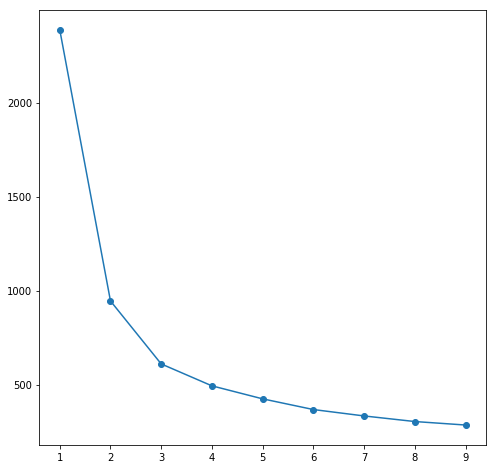

In [291]:
plt.figure(figsize=(8,8))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

1. we select that value of k where the gradiant reduces drastically 
2. here in the elbow curve we can obsever that gradiant from k= 3 to k= 4 is changing at higher rate so in this k we will go with k= 3
3. k= 3 we will select

### Using optimal value of K - Cluster the data.

In [292]:
cluster = KMeans( n_clusters = 3, init='k-means++' )
cluster.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [293]:
# kmeans.cluster_centers_ function to pull the centroid information from the instance

centroids = cluster.cluster_centers_
centroids

array([[ 0.34598334,  0.23689416, -0.06887301,  0.29795187,  0.30089004,
        -0.47244453],
       [-0.85347696, -0.80321374, -0.67323192, -0.78549879,  0.36133415,
         0.75394661],
       [ 1.4860546 ,  1.48450715,  1.50343372,  1.38753374, -1.06267868,
        -1.15110476]])

In [294]:
# Store the centroids in a dataframe with column names from the original dataset given

centroid_df = pd.DataFrame(centroids, columns = list(df) )
centroid_df.head()


,cyl,disp,hp,wt,acc,mpg
0,0.345983,0.236894,-0.068873,0.297952,0.300890,-0.472445
1,-0.853477,-0.803214,-0.673232,-0.785499,0.361334,0.753947
2,1.486055,1.484507,1.503434,1.387534,-1.062679,-1.151105


## visualisation of our cluster


In [295]:
labels=cluster.predict(scaled_df)
scale_df = pd.DataFrame(scaled_df)
scale_df["GROUP"] = labels

In [296]:
# counting number of points in each cluster
scale_df["GROUP"].value_counts()

1    207
2     97
0     94
Name: GROUP, dtype: int64

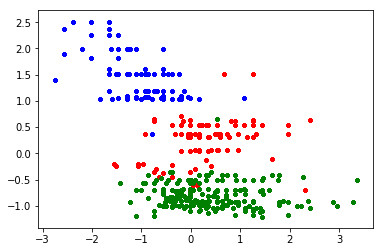

In [297]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(scale_df.loc[scale_df['GROUP'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 4], points[:, 1], s=7, c=colors[i])

### Use kmeans.labels_ function to print out the labels of the classes

In [298]:
cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0,

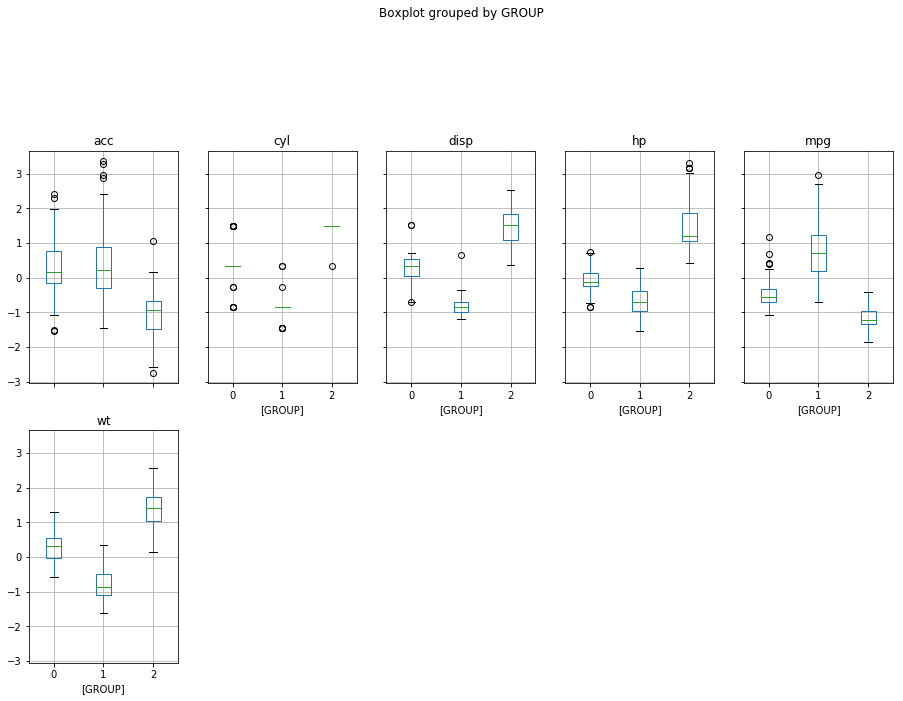

In [299]:
import matplotlib.pylab as plt
scaled_df.boxplot(by = 'GROUP',  layout=(5,5), figsize=(15, 25));

## Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

In [300]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
 

X = scale_df.drop(columns= 'GROUP', axis= 1)
y = scale_df['GROUP']

print ('Independent variable data shape ', X.shape)
print ('dependent variable data shape ', y.shape)

Independent variable data shape  (398, 6)
dependent variable data shape  (398,)


In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print ('X_train set shape  ', X_train.shape)
print ('y_train set shape  ', y_train.shape)
print ('X_test set shape  ', X_test.shape)
print ('X_test set shape  ', y_test.shape)

X_train set shape   (318, 6)
y_train set shape   (318,)
X_test set shape   (80, 6)
X_test set shape   (80,)


In [302]:
regressor_drop_yr = LinearRegression()  
regressor_drop_yr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [303]:
coeff_df = pd.DataFrame(regressor_drop_yr.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
cyl,-0.023332
disp,0.074285
hp,0.540422
wt,-0.033837
acc,-0.091071
mpg,0.302529


In [304]:
y_pred = regressor_drop_yr.predict(X_test) # predict the data

In [305]:
ytrue_ypred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
ytrue_ypred.head()

,Actual,Predicted
65,2,1.456233
132,1,0.613312
74,2,1.092579
78,1,0.513858
37,0,0.754066


In [306]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('explained_variance_score:' , metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error: 0.42335122590899193
Mean Squared Error: 0.28465230042023393
Root Mean Squared Error: 0.5335281627245501
explained_variance_score: 0.4399120744315498
